In [1]:
import sys
sys.path.append( "/home/peer/PycharmProjects/neslearng")

In [ ]:
!pwd

In [2]:
import pandas
from hsa.ba.analyse_ram import ram_from_movie
# from hsa.ba.rewards import time_left, make_delta_potential
import hsa.ba.rewards as rewards
import importlib

In [ ]:
importlib.reload(rewards)

In [3]:
%matplotlib notebook

In [4]:
without_shortcut = pandas.DataFrame.from_records(ram_from_movie("../../movies/5_1-1_without-shortcut.fm2"))

In [5]:
with_shortcut = pandas.DataFrame.from_records(ram_from_movie("../../movies/6_1-1_with_shortcut.fm2"))

In [ ]:
without_shortcut[0x071A].plot()

In [ ]:
with_shortcut[0x071A].plot()

In [ ]:
def dedup(arraylike):
    last = None
    for current in arraylike:
        if last != current:
            yield current
        last = current

In [ ]:
list(dedup(with_shortcut[0x071B]))

In [ ]:
list(zip(dedup(with_shortcut[0x071A]),dedup(with_shortcut[0x071B])))

In [ ]:
list(dedup(without_shortcut[0x071A]))

In [ ]:
list(zip(dedup(without_shortcut[0x071A]),dedup(without_shortcut[0x071B])))

0x03AD 	Player x pos within current screen offset

In [ ]:
without_shortcut[0x03AD].plot()
with_shortcut[0x03AD].plot()

0x006D 	Player horizontal position in level

In [ ]:
without_shortcut[0x006D].plot()
with_shortcut[0x006D].plot()


0x0750 	Area loaded

In [ ]:
without_shortcut[0x0750].plot()
with_shortcut[0x0750].plot()

In [ ]:
without_shortcut[0x0750].plot()
without_shortcut[0x071A].plot()

In [ ]:
with_shortcut[0x0750].plot()
with_shortcut[0x071A].plot()

In [ ]:
with_shortcut.apply(time_left)

In [ ]:
with_shortcut[0x07F8].plot()
with_shortcut[0x07F9].plot()
with_shortcut[0x07FA].plot()

0713 - Used during flag contact

In [ ]:
with_shortcut[0x0713].plot()

In [ ]:
with_shortcut[0x0713].nlargest(10)


06A0 - Screen Memory Offset

In [ ]:
without_shortcut[0x06A0].plot()
with_shortcut[0x06A0].plot()

0x0773 	Level palette 

In [ ]:
with_shortcut[0x0773].plot()

0x000E 	Player's state 
- 0x00 - Leftmost of screen
- 0x01 - Climbing vine
- 0x02 - Entering reversed-L pipe
- 0x03 - Going down a pipe
- 0x04 - Autowalk
- 0x05 - Autowalk
- 0x06 - Player dies
- 0x07 - Entering area
- 0x08 - Normal
- 0x09 - Cannot move
- 0x0B - Dying
- 0x0C - Palette cycling, can't move

In [ ]:
with_shortcut[0x071A].plot()
with_shortcut[0x000E].plot()

### using player state current screen 

In [ ]:
delta_potential = rewards.make_delta_potential()
without_potential_deltas= [delta_potential(row[1]) for row in without_shortcut.iterrows()]
pandas.Series(without_potential_deltas).plot()

In [ ]:
sum(without_potential_deltas)

In [6]:
delta_potential = rewards.make_delta_potential()
with_potential_deltas= [delta_potential(row[1]) for row in with_shortcut.iterrows()]


<IPython.core.display.Javascript object>


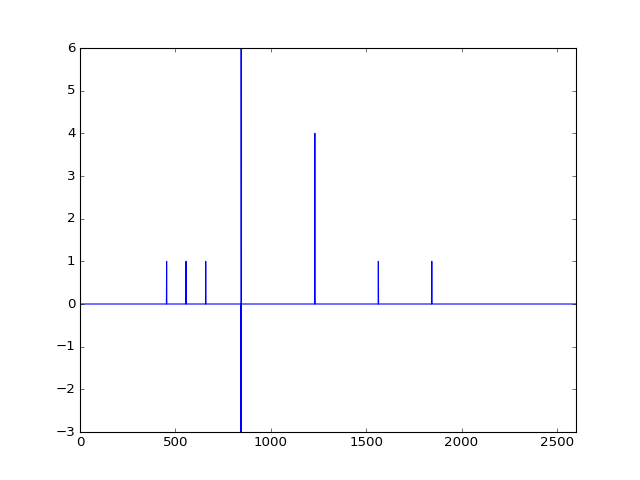

In [8]:
pandas.Series(with_potential_deltas).plot()

<IPython.core.display.Javascript object>


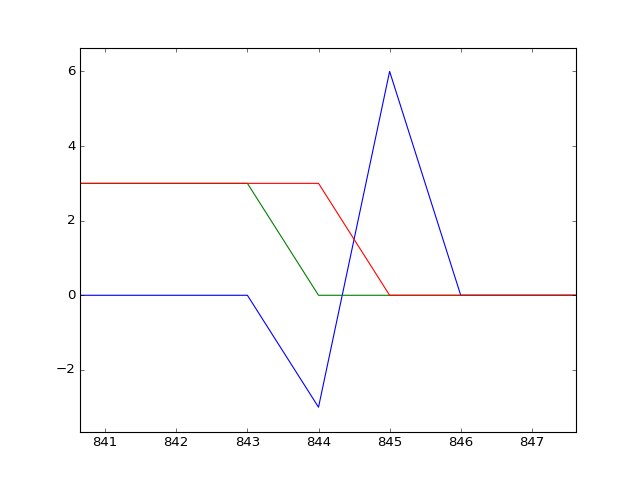

In [9]:
pandas.Series(with_potential_deltas).plot(color = "blue")
# screen green
with_shortcut[0x071A].plot(color="green")
# state red
with_shortcut[0x000E].plot(color="red")

In [7]:
sum(with_potential_deltas)

12